In [1]:
import os
os.getcwd()  # Get Working Directory

'C:\\Users\\Jan\\DroneCourse\\JanGIT\\final_2'

In [2]:
%%time
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras

Using TensorFlow backend.


Wall time: 4.42 s


In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [6]:
# dimensions of our images.
img_width, img_height = 150, 150

In [7]:

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 413
nb_validation_samples = 100
epochs = 50
batch_size = 20

In [8]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [10]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [11]:
training = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
x,y = training.next()

Found 826 images belonging to 2 classes.


In [12]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0.], dtype=float32)

In [13]:
validation = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

x,y = validation.next()

Found 200 images belonging to 2 classes.


In [14]:
y

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0.], dtype=float32)

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [17]:
history = model.fit_generator(
    training,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
17/17 [==============================] - 13s 761ms/step - loss: 0.6964 - accuracy: 0.5235 - val_loss: 0.6903 - val_accuracy: 0.5500
Epoch 2/50
17/17 [==============================] - 12s 716ms/step - loss: 0.6860 - accuracy: 0.5794 - val_loss: 0.6941 - val_accuracy: 0.4900
Epoch 3/50
17/17 [==============================] - 11s 634ms/step - loss: 0.6829 - accuracy: 0.6104 - val_loss: 0.6873 - val_accuracy: 0.5800
Epoch 4/50
17/17 [==============================] - 11s 639ms/step - loss: 0.6814 - accuracy: 0.5588 - val_loss: 0.6711 - val_accuracy: 0.5900
Epoch 5/50
17/17 [==============================] - 11s 618ms/step - loss: 0.6826 - accuracy: 0.6135 - val_loss: 0.6736 - val_accuracy: 0.5000
Epoch 6/50
17/17 [==============================] - 11s 638ms/step - loss: 0.6807 - accuracy: 0.5500 - val_loss: 0.6696 - val_accuracy: 0.6900
Epoch 7/50
17/17 [==============================] - 11s 629ms/step - loss: 0.6569 - accuracy: 0.6074 - val_loss: 0.6543 - val_accuracy: 0.5900

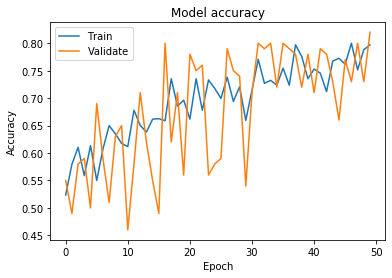

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [19]:
predictions = model.predict(validation)

In [20]:
predictions

array([[0.7803006 ],
       [0.887013  ],
       [0.29371053],
       [0.5652613 ],
       [0.37793908],
       [0.53001803],
       [0.6017743 ],
       [0.68360186],
       [0.86305475],
       [0.60964894],
       [0.3708137 ],
       [0.3313943 ],
       [0.26684391],
       [0.27801478],
       [0.5212018 ],
       [0.35217556],
       [0.37936527],
       [0.66855127],
       [0.7740883 ],
       [0.14072065],
       [0.24323261],
       [0.91261756],
       [0.8415446 ],
       [0.30176812],
       [0.46431446],
       [0.3731757 ],
       [0.4079898 ],
       [0.4593924 ],
       [0.53317815],
       [0.8314506 ],
       [0.62915796],
       [0.10025811],
       [0.57633406],
       [0.7874147 ],
       [0.56754225],
       [0.8747085 ],
       [0.6000565 ],
       [0.7562981 ],
       [0.5510587 ],
       [0.8583711 ],
       [0.41719913],
       [0.16968887],
       [0.28635532],
       [0.69382584],
       [0.75028133],
       [0.18935423],
       [0.43890128],
       [0.826

In [21]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [22]:
newpredictions =  np.rint(predictions)

In [23]:
newpredictions

array([[1.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.00